# Problem statement: 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [2]:
train = pd.read_csv(r"C:\Users\sudes\Downloads\Train.csv")
test = pd.read_csv(r"C:\Users\sudes\Downloads\Test.csv")

# Understanding the data: 

In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Information about the variables: 

1. Item identifier: Unique product ID given to the product. 
2. Item weight: Item weight - it can have significant effect on the sales of the product. 
3. Item fat content: Sales of the product can be impacted by the fat content product has. 
4. Item visiblity: It does have the clear and cut effect. If the product is visible, it will be sold more. 
5. Item type: It does have the direct impact on the sales, if the product is of regular use then it will be sold more then the product which is of not regular use.
6. Item MRP: If the product is expensive then it will be sold less than the product which is cheaper. 
7. Outlet Identifier: It is unique ID for each store. 
8. Outlet eastablishment year: It portrays in which year, the store was built. 
9. Outlet size: It depicts how big store is and how many products it can occupy. 
10. Item outlet sales: It depicts how the product is sold in terms of each respetive store. 

# Shape of the dataset: 

In [7]:
train.shape

(8523, 12)

In [8]:
test.shape

(5681, 11)

Observations:    
    1. The train data consists of 8,523 training examples with 12 features.
    2. The test data consists of 5,681 training examples with 11 features.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have numerical features: item weight, item visiblity, item MRP, eastablishment year, and item outlet sales. Rest of the the varaibles are categorical in nature. 

# Categorical and numerical features: 

In [13]:
categorical_columns_train = train.select_dtypes(include=[object])
print("Training categorical Features in Train Set:", len(categorical_columns_train.columns))
numerical_columns_train = train.select_dtypes(include=[np.float64, np.int64])
print("Training numerical Features in Train Set:", len(categorical_columns_train.columns))

# testing categorical and numerical columns
categorical_columns_test = test.select_dtypes(include=[object])
print("\nTesting categorical Features in Test Set:", len(categorical_columns_test.columns))
numerical_columns_test = test.select_dtypes(include=[np.float64, np.int64])
print("Testing numerical Features in Test Set:", len(numerical_columns_test.columns))

Training categorical Features in Train Set: 7
Training numerical Features in Train Set: 7

Testing categorical Features in Test Set: 7
Testing numerical Features in Test Set: 4


# Univaraiate Data Analysis: 

In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Observations: 
    
    1. Total count of Item_Weight is 7060 which is less than the length of the training dataset, therefore it may contains some missing values.
    2. The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.
    3. The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.
    4. Most recent store was established in 2009 and the oldest store was established in 1985.
    5. Average sales of items is Rs 2181 and the maximum sale is Rs 13,086.

# Checking the null values: 

In [16]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In total, item weight and outlet size does have the missing values. 

# Fixing the null values: 

In [18]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace = True)

In [19]:
test['Item_Weight'].fillna((test['Item_Weight'].mean()), inplace = True)

In [20]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since outlet size is in object data type --> So we can fill the missing values of this variable with mode method. 

In [22]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [23]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace = True)

In [24]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now all the missing values have been filled. Dataframe is good to go now. 

# Encoding the categorical features now: 

In [25]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})

In [26]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
# Changing the column type to string 
train["Item_Fat_Content"] = train["Item_Fat_Content"].apply(str)
test["Item_Fat_Content"] = test["Item_Fat_Content"].astype(str)

In [28]:
# Displaying the percentage of categorical values in "Item_Fat_Content": 
print("Percentage of 'Item_Fat_Content' column values in training dataset\n")
print(train["Item_Fat_Content"].value_counts() / train.shape[0] * 100)
print("-"*60)
print("Percentage of 'Item_Fat_Content' column values in test dataset\n")
print(test["Item_Fat_Content"].value_counts() / test.shape[0] * 100)

Percentage of 'Item_Fat_Content' column values in training dataset

Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64
------------------------------------------------------------
Percentage of 'Item_Fat_Content' column values in test dataset

Low Fat    64.566098
Regular    35.433902
Name: Item_Fat_Content, dtype: float64


In [29]:
train['Item_Identifier'] = train['Item_Identifier'].astype(str).str[:2]

In [30]:
train['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [31]:
test['Item_Identifier'] = test['Item_Identifier'].astype(str).str[:2]

In [32]:
test['Item_Identifier'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier, dtype: int64

# Exploratory Data Anlysis: 

In [35]:
def plot_univariate(col,width,height):
    """
    INPUT:
        col: Column name to be ploted 
        width: Figure width
        height: Figure hight 
        
    RETURN: 
        A plot of counted categorical items in the column
    """
    plt.figure(figsize=(width,height))
    sns.countplot(x=col,data=train,palette='Blues_r',
                  order=train[col].value_counts().index)

    plt.title("Distribution of "+col+" in the supermarkets",fontsize=18)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel("Count",fontsize=16)

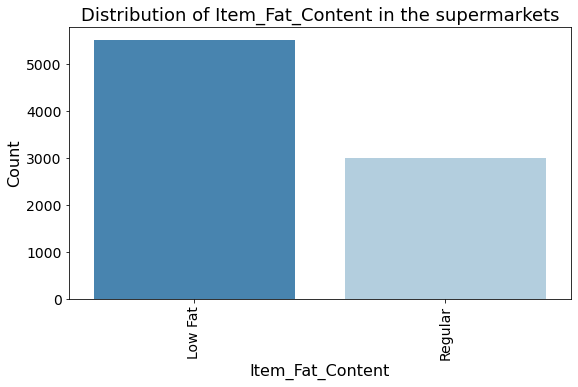

In [36]:
plot_univariate(col="Item_Fat_Content",width=9,height=5)

Observation: Low fat content is sold more in comparison to the regular fat. 

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

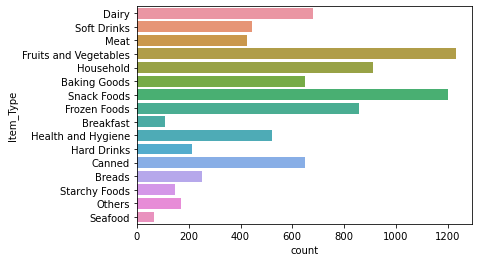

In [37]:
sns.countplot(y='Item_Type',data=train)

Observation: 
    
    Fruits and vegetables, household, snack food, and frozen food are sold maximum number of times in comparison to other products. 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

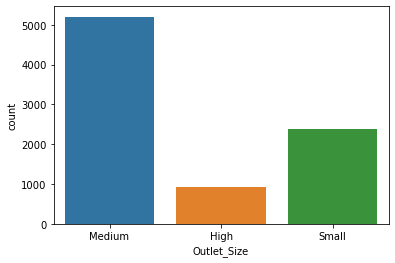

In [38]:
sns.countplot(x='Outlet_Size',data=train)

Observation: 
    In terms of size in outlet, Small is dominating followed by medium.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

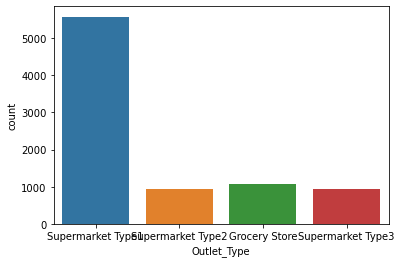

In [39]:
sns.countplot(x='Outlet_Type',data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

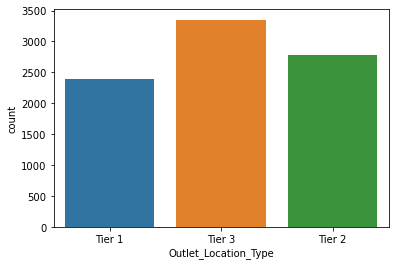

In [40]:
sns.countplot(x='Outlet_Location_Type',data=train)

Observation: 
Supermarket is the location where the maximum sales are done. Further Tier type 3 outlet has the good presence followed by Tier 2.

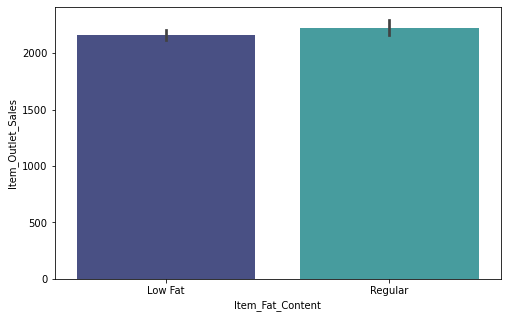

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,palette='mako');

Observation: 
    
    The range of prices per item whether it is Low_Fat or Regular are approximatly near to each others, but higher in regular itmes.

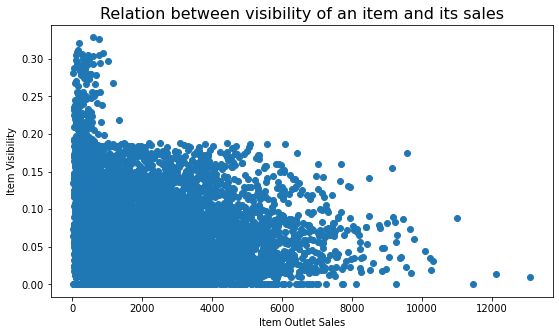

In [43]:
plt.figure(figsize=(9,5))
plt.scatter(x='Item_Outlet_Sales',y='Item_Visibility',data=train)
plt.title("Relation between visibility of an item and its sales", fontsize=16)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility');

Observation: 
    
    It shows how item visiblity have a very minimal effect on the outlet sales. Almost each material is bought by some customer. At the right, there are outliers present in the dataset. 

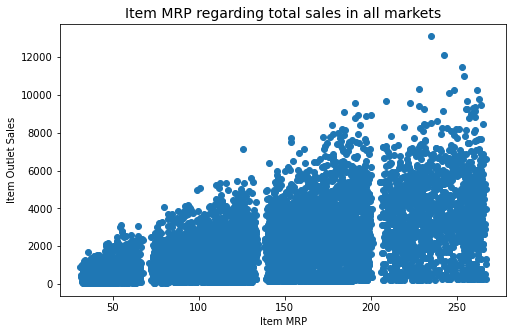

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title("Item MRP regarding total sales in all markets", fontsize=14);

Observation: 
    
    We have MRP into 4 different categories. The items are sold maxium number of times which are quite high in MRP value. 

In [45]:
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985,1463.0,2483.677474,2347.516621,33.9558,399.48000,1845.5976,3968.16800,13086.9648
1987,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
1997,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362
1998,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
1999,930.0,2348.354635,1513.289464,111.8544,1182.79370,1966.1074,3281.72820,7646.0472
2002,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
2004,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
2007,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
2009,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228


From the following description of the data: 
    
    It is very clear that when it was the first year of eastablishment, the sales were at the peak (13086) but later on it declined year by year. Let us figure out how it is poosible and why it happenend?

# Creating the dataframe for the varibles that are in integer and float datatype: 

In [46]:
df_num=train.select_dtypes(["int64","float64"])
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

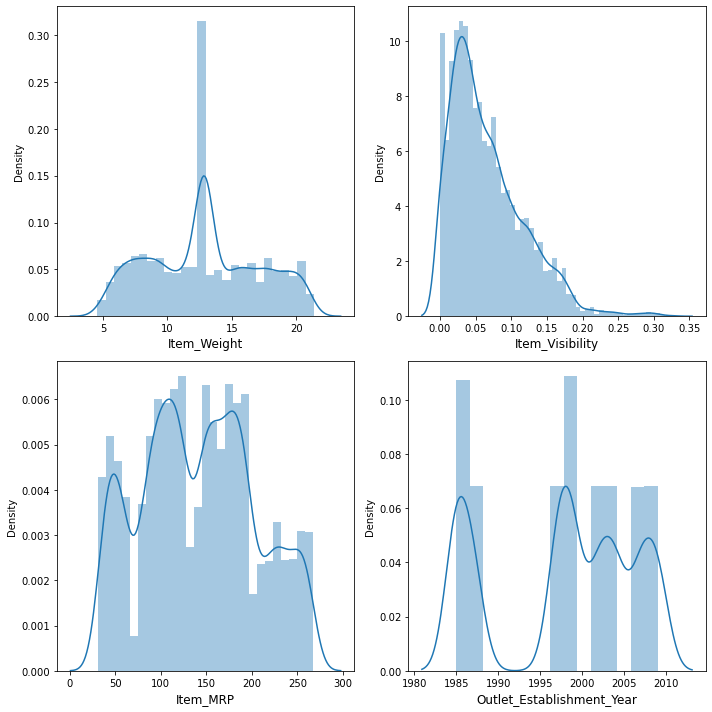

In [47]:
### Checking the data distribution: 
j=0
plt.figure(figsize=(10,10))
for column in df_num.drop('Item_Outlet_Sales', axis = 1).columns:
    plt.subplot(2,2,j+1)
    sns.distplot(df_num[column])
    plt.xlabel(column,fontsize=12)
    j+=1
    
plt.tight_layout()

Onservation: 
    
    1. Item weight is normally distributed. 
    2. Item visiblity is rightly skewed, that means their are certain outliers available in the variable. 
    3. There is no clear distribution followed by the Item MRP and Outler eastbalishment year. 

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


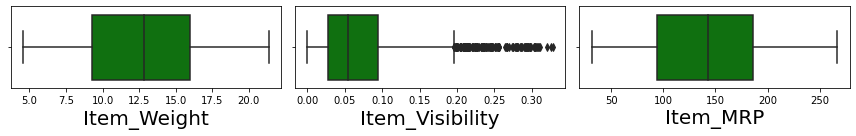

In [48]:
### Checking whether the numeric variables include outliers. 

plt.figure(figsize=(12,2), facecolor='white')
plotnumber =1
for column in df_num.drop('Item_Outlet_Sales', axis = 1).columns:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(df_num[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation: 
    
    Outliers are present in the Item Visiblity variables, rest of the variable doesn't have outliers in them. 

In [49]:
### Checking for skewness 

df_num.skew().sort_values(ascending = True)

Outlet_Establishment_Year   -0.396641
Item_Weight                  0.090561
Item_MRP                     0.127202
Item_Visibility              1.167091
Item_Outlet_Sales            1.177531
dtype: float64

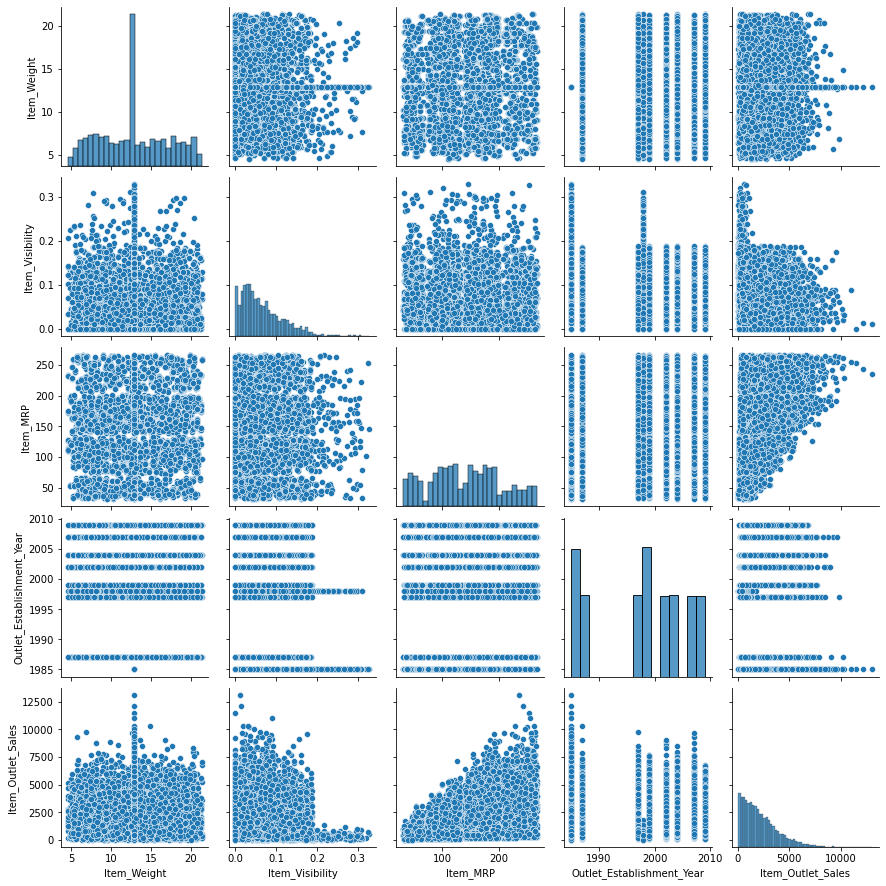

In [50]:
### Distrbution using pairplot 

sns.pairplot(df_num)

In [51]:
### Checking the correlation among the numeric variables. 
df_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

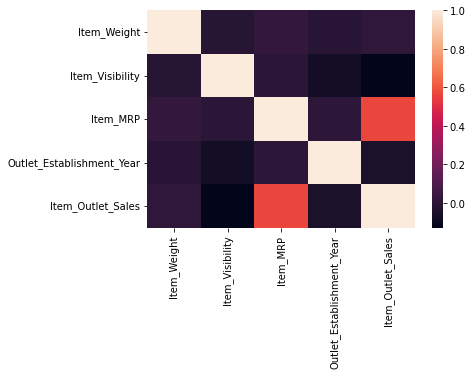

In [52]:
sns.heatmap(df_num.corr())

Observation: 
    
    1. Item visiblity and outlet_eastablishment_year is negtaivly correlated with the item_outlet_sales. 
    2. Rest of the variable is positively correlated with tge item_outlet_sales. 

In [53]:
# Converting Establishment year to string value
train['Outlet_Establishment_Year'] = train['Outlet_Establishment_Year'].astype(str)
test['Outlet_Establishment_Year'] = test['Outlet_Establishment_Year'].astype(str)

# Encoding the categorical variables into numeric with LabelEncoding: 

In [57]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [58]:
le = LabelEncoder()
train['Item_Identifier'] = le.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = le.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = le.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])

In [59]:
train.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year     object
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [60]:
test.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [61]:
le = LabelEncoder()
test['Item_Identifier'] = le.fit_transform(test['Item_Identifier'])
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = le.fit_transform(test['Item_Type'])
test['Outlet_Identifier'] = le.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = le.fit_transform(test['Outlet_Type'])
train['Outlet_Establishment_Year'] = le.fit_transform(train['Outlet_Establishment_Year'])
test['Outlet_Establishment_Year'] = le.fit_transform(test['Outlet_Establishment_Year'])

In [62]:
test.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int32
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

# Remving outliers and skewness from the distributuion: 

In [63]:
train.skew()

Item_Identifier              0.114510
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [64]:
test.skew()

Item_Identifier              0.121499
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year    0.034635
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [65]:
from scipy.stats import zscore 
z = zscore(train)
zt = zscore(test)

In [66]:
print("Train outliers rows: ", np.where(z>3))
print("Test outliers rows: ", np.where(zt>3))

Train outliers rows:  (array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 700

In [67]:
strain = train[(z<3).all(axis=1)]
stest = test[(z<3).all(axis =1)]

C:\Users\sudes\AppData\Local\Temp/ipykernel_18068/1056015676.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stest = test[(z<3).all(axis =1)]


In [68]:
strain.shape

(8338, 12)

In [70]:
train.shape

(8523, 12)

In [71]:
stest.shape

(5564, 11)

In [72]:
test.shape

(5681, 11)

# Changing the initail data into skewness free: 

In [73]:
train = strain
test = stest

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

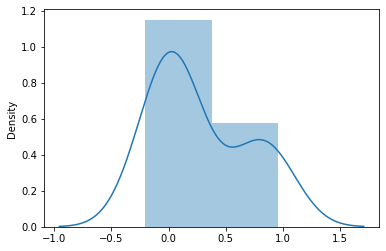

In [75]:
sns.distplot(train.skew())

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

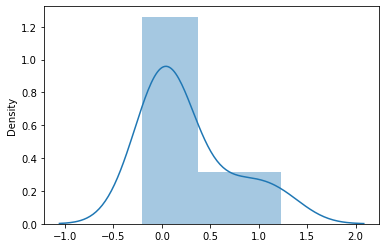

In [76]:
sns.distplot(test.skew())

In [77]:
from sklearn.preprocessing import power_transform

In [78]:
trainp = power_transform(train)

In [79]:
testp = power_transform(test)

In [83]:
ptrain = pd.DataFrame(data = trainp, columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])

In [85]:
ptest = pd.DataFrame(data = testp, columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'])

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

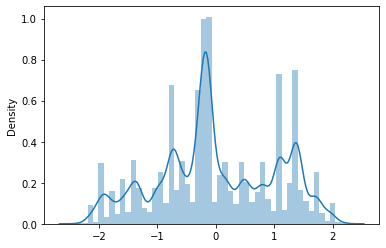

In [86]:
sns.distplot(ptrain)

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

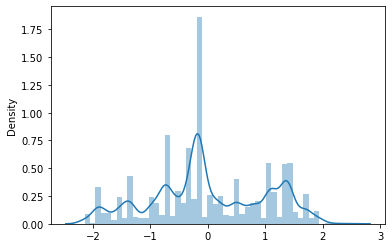

In [87]:
sns.distplot(ptest)

# The data is normally distributed now -> All the skewness and outliers are removed from the dataset. Now Data is good to go. 

# Splitting the dataset into independent and dependent variable: 

In [88]:
y= train['Item_Outlet_Sales']
X= train.drop("Item_Outlet_Sales", axis=1)

In [90]:
trainx, testx, trainy, testy = train_test_split(X,y,test_size = 0.2, random_state = 45)

In [91]:
lr = LinearRegression()
lr.fit(trainx,trainy)

LinearRegression()

In [92]:
pred = lr.predict(testx)

In [93]:
print("Coefficient of Determination:", r2_score(testy,pred))
print("MSE:", mean_squared_error(testy,pred))
print("MAE:", mean_absolute_error(testy,pred))

Coefficient of Determination: 0.49532847196612717
MSE: 1300519.3272854465
MAE: 867.4835208028941


The model score is 0.49. 

In [95]:
from sklearn.model_selection import GridSearchCV

In [100]:
alphavalue = {'alpha': [1,0.1,0.01,0.001,0]}
grid = GridSearchCV(estimator = rd, param_grid = alphavalue)
grid.fit(trainx,trainy)

print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_estimator_.alpha)

Best Score:  0.49707344016910326
Best Params:  1


In [102]:
rd = Ridge(alpha = 1)
rd.fit(trainx,trainy)
rdpred = rd.predict(testx)
print("Coefficient of Determination:", r2_score(testy,rdpred))
print("MSE:", mean_squared_error(testy,rdpred))
print("MAE:", mean_absolute_error(testy,rdpred))

Coefficient of Determination: 0.49532384095110116
MSE: 1300531.2612349794
MAE: 867.4922308473954


In [103]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(trainx,trainy)
dtpr = dt.predict(testx)
print("Coefficient of Determination:", r2_score(testy,dtpr))
print("MSE:", mean_squared_error(testy,dtpr))
print("MAE:", mean_absolute_error(testy,dtpr))

Coefficient of Determination: 0.16183273524167352
MSE: 2159925.1528273625
MAE: 1032.1113448441247


In [104]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(trainx,trainy)
spred = sv.predict(testx)
print("Coefficient of Determination:", r2_score(testy,spred))
print("MSE:", mean_squared_error(testy,spred))
print("MAE:", mean_absolute_error(testy,spred))

Coefficient of Determination: 0.21580620203950407
MSE: 2020837.5823344486
MAE: 1071.8529622752412


In [106]:
### Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
gbr = GradientBoostingRegressor()
gbr.fit(trainx, trainy)
gpred = gbr.predict(testx)

In [108]:
print("Coefficent of determination: ", r2_score(testy, gpred)*100)

Coefficent of determination:  59.5908600539242


In [109]:
rf = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
rf.fit(trainx, trainy)
rpred = rf.predict(testx)
print("Coefficent of determination: ", r2_score(testy, rpred)*100)

Coefficent of determination:  47.282108899959496


# The highest R2 score is 59.59 coming with Gradient Boosting Regressor.

In [110]:
### Saving the model now. 
# pickeling or serialization of a file
import pickle
filename = 'bigdatamartsalesprobelm.pkl'
pickle.dump(gbr, open(filename, 'wb'))